# <font style="font-size:40px"><center><b>Quantitative Risk Management</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 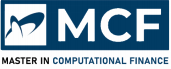

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 2</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Dr. Vladislav Radak

<b>students: </b> 
Nikola Krivacevic, Aleksandar Milinkovic, Milos Milunovic
</center>





### <font color='MediumVioletRed' style="font-size:20px"><b>Installing and importing Libraries:</b></font>

In [36]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials

In [37]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np 
import pandas as pd
import matplotlib. pyplot as plt 
from scipy.stats import norm
import scipy
import yfinance as yf 
from yahoofinancials import YahooFinancials
from tabulate import tabulate 
import plotly.graph_objects as go

### <font color='MediumVioletRed' style="font-size:20px"><b>Assignment 4:</b></font>
Construct a portfolio of 10 S&P500 stocks with equal weights. Make a short python example that shows the development of Value at Risk and ES on a graph for the last 150 days. Compare it with VaR and ES of S&P500 for the same time frame.

In [38]:
def get_portfolio_asset_returns(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  returns = stock_data.pct_change()
  return returns

Let's construct a equally-weighted portfolio of 10 stocks:
- Netflix
- Caterpilar
- Delta Airlines
- US Steel
- Boeing
- AT&T
- The Walt Disney company
- AMZN
- Starbucks
- Ford

In [39]:
# Portfolio assets
stocks = ["NFLX", "CAT", "DAL", "X", "BA", "T", "DIS", "AMZN", "SBUX", "F"]

# Weights for equally weighted portfolio
weights = np.array([1/10]*10)

In [40]:
# Time horizon
start = '2018-01-01'
end = '2021-09-01'

# Stock returns
returns = get_portfolio_asset_returns(stocks=stocks, start=start, end=end)
returns.tail()

,AMZN,BA,CAT,DAL,DIS,F,NFLX,SBUX,T,X
Date,,,,,,,,,,
2021-08-25,-0.001997,-0.001806,0.010207,0.018998,-0.000897,0.006881,-0.010535,0.004258,-0.000729,-0.020093
2021-08-26,0.005098,-0.020495,-0.016390,-0.012833,-0.009814,-0.020501,0.004639,-0.010816,-0.014947,-0.024533
2021-08-27,0.010142,0.024249,0.007527,0.018396,0.020276,0.031783,0.015996,0.006998,0.004071,0.036787
2021-08-30,0.021477,-0.018444,-0.006484,-0.038777,-0.000888,-0.019534,0.012989,0.004256,0.003686,-0.020275
2021-08-31,0.014385,0.008454,-0.002743,0.013280,0.007334,-0.001533,0.005316,0.016262,0.006978,-0.011456


In [41]:
# S&P500 returns
snp500_returns = get_portfolio_asset_returns(stocks=["^GSPC"], start=start, end=end)
snp500_returns.tail()

Date
2021-08-25    0.002220
2021-08-26   -0.005825
2021-08-27    0.008808
2021-08-30    0.004307
2021-08-31   -0.001349
Name: Close, dtype: float64

In [42]:
# Plotting stock daily returns against S&P500 returns
fig=go.Figure()
for ticker in stocks:
  fig.add_trace(go.Scatter(x=returns.index, y=returns[ticker], name=ticker))
fig.add_trace(go.Scatter(x=snp500_returns.index, y=snp500_returns.values, name="S&P 500"))
fig.update_layout(xaxis_title='Dates',yaxis_title='Daily returns',
        title=dict(text='Stocks daily returns', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

Let's not calculate VAR and ES for both the S&P500 and our portfolio and compare the results.

1. Calulating VAR and ES for the S&P 500 index

In [43]:
def var_historical(returns, confidence_level=0.05):
  """Calculates historical VAR with a given conficence level, non-parametric metric"""
	
  return returns.quantile(confidence_level, interpolation='linear')

In [44]:
def es_historical(returns, confidence_level=0.05):
  """Calculates Expected Shortfall (ES)"""
	
  # Calculating VaR
  var = var_historical(returns, confidence_level)
	
	# Given the VAR, ES (AVAR, CVAR) is the average of the worst losses
  return returns[returns.lt(var)].mean()

In [45]:
snp500_returns.describe()

count    922.000000
mean       0.000656
std        0.013737
min       -0.119841
25%       -0.003806
50%        0.001127
75%        0.006859
max        0.093828
Name: Close, dtype: float64

In [46]:
# Calculating 95% VAR and 95% ES for the last 150 days
snp500_var_95 = []
snp500_var_99 = []
snp500_es_95 = []
snp500_es_99 = []

for i in range(len(snp500_returns) -150, len(snp500_returns)):
  # Calculating VAR
  snp500_var_95.append(-var_historical(snp500_returns[0:i].dropna(), confidence_level=0.05))
  snp500_var_99.append(-var_historical(snp500_returns[0:i].dropna(), confidence_level=0.01))
  
  # Calcularing ES
  snp500_es_95.append(-es_historical(snp500_returns[0:i].dropna(), confidence_level=0.05))
  snp500_es_99.append(-es_historical(snp500_returns[0:i].dropna(), confidence_level=0.01))

In [47]:
# Plotting VAR and AVAR for S&P500 index
fig=go.Figure()
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_var_95, name="95% VAR"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_var_99, name="99% VAR"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_es_95, name="95% ES"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_es_99, name="99% ES"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_returns[len(snp500_returns) -150: len(snp500_returns)], name="S&P500 daily returns"))
fig.update_layout(xaxis_title='Last 150 days',yaxis_title='Expected loss for the given risk measure',
        title=dict(text='S&P500 VAR and ES', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

On the plot above we can see the 95% and 99% VAR and ES for S&P500 index.

We can see that 99% VAR/ES is higher than 95% VAR/ES for abound 2 basis points on avegare.

What is also expected from theoretical properties and here we can observe, is that ES risk measure give us greater values, because it calculates the average of the VaRs which are larger than the VaR at tail probability  𝜖.

2. Calulating VAR and ES for our portfolio

In [48]:
# Portfolio asset statistical properties
returns.describe()

,AMZN,BA,CAT,DAL,DIS,F,NFLX,SBUX,T,X
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.001363,0.000234,0.000551,0.000104,0.000725,0.000347,0.001465,0.000952,-0.000238,0.000456
std,0.020037,0.033494,0.021424,0.030521,0.020126,0.025270,0.025991,0.018934,0.016146,0.040596
min,-0.079221,-0.238484,-0.142822,-0.259924,-0.129846,-0.110124,-0.111389,-0.162042,-0.092410,-0.170319
25%,-0.008096,-0.013572,-0.010212,-0.011933,-0.007839,-0.011920,-0.011749,-0.007075,-0.006588,-0.021940
50%,0.001670,-0.000862,0.000592,0.000000,0.000307,0.000000,0.000981,0.001030,0.000865,0.000000
75%,0.011313,0.013339,0.012100,0.010821,0.008620,0.011729,0.015306,0.008795,0.007068,0.020950
max,0.094452,0.243186,0.103321,0.210171,0.144123,0.234414,0.168543,0.147303,0.100223,0.232699


In [49]:
# Portfolio asset returns
returns.tail()

,AMZN,BA,CAT,DAL,DIS,F,NFLX,SBUX,T,X
Date,,,,,,,,,,
2021-08-25,-0.001997,-0.001806,0.010207,0.018998,-0.000897,0.006881,-0.010535,0.004258,-0.000729,-0.020093
2021-08-26,0.005098,-0.020495,-0.016390,-0.012833,-0.009814,-0.020501,0.004639,-0.010816,-0.014947,-0.024533
2021-08-27,0.010142,0.024249,0.007527,0.018396,0.020276,0.031783,0.015996,0.006998,0.004071,0.036787
2021-08-30,0.021477,-0.018444,-0.006484,-0.038777,-0.000888,-0.019534,0.012989,0.004256,0.003686,-0.020275
2021-08-31,0.014385,0.008454,-0.002743,0.013280,0.007334,-0.001533,0.005316,0.016262,0.006978,-0.011456


In [50]:
# Portfolio returns
returns_p = returns * weights
returns_p = returns_p.dropna().sum(axis=1)
returns_p

Date
2018-01-03    0.002854
2018-01-04    0.005722
2018-01-05    0.014233
2018-01-08    0.003445
2018-01-09   -0.004220
                ...   
2021-08-25    0.000429
2021-08-26   -0.012059
2021-08-27    0.017623
2021-08-30   -0.006199
2021-08-31    0.005628
Length: 922, dtype: float64

In [51]:
# Plotting portfolio daily returns against S&P500 returns
fig=go.Figure()
fig.add_trace(go.Scatter(x=snp500_returns.index, y=snp500_returns.values, name="S&P 500"))
fig.add_trace(go.Scatter(x=returns_p.index, y=returns_p.values, name="Portfolio"))
fig.update_layout(xaxis_title='Dates',yaxis_title='Daily returns',
        title=dict(text='Portfolio vs S&P 500 daily returns', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

In [52]:
# Calculating 95% VAR and 95% ES for the last 150 days
portfolio_var_95 = []
portfolio_var_99 = []
portfolio_es_95 = []
portfolio_es_99 = []

for i in range(len(returns_p) -150, len(returns_p)):
  # Calculating VAR
  portfolio_var_95.append(-var_historical(returns_p[0:i].dropna(), confidence_level=0.05))
  portfolio_var_99.append(-var_historical(returns_p[0:i].dropna(), confidence_level=0.01))
  
  # Calcularing ES
  portfolio_es_95.append(-es_historical(returns_p[0:i].dropna(), confidence_level=0.05))
  portfolio_es_99.append(-es_historical(returns_p[0:i].dropna(), confidence_level=0.01))

In [53]:
# Plotting VAR and AVAR for our portfolio
fig=go.Figure()
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_var_95, name="95% VAR"))
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_var_99, name="99% VAR"))
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_es_95, name="95% ES"))
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_es_99, name="99% ES"))
fig.update_layout(xaxis_title='Last 150 days',yaxis_title='Expected loss for the given risk measure',
        title=dict(text='Portfolio VAR and ES', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

Similar like for the VAR and ES for the S&P500, we can observe that for our portfolio over last 150 days maximumum expected loss for the 95% and 99% VAR and ES was slightly decreasing.

3. VAR and ES comparison between our portfolio and S&P 500 index

Now, lets compare the risk measures for our portfolio and for the S&P 500 index. As we already hand picked 10 stocks from the list of S&P 500 companies, given that we have only 10 stocks compared to the 500 stocks in the index, we expect to see higher potential losses for our portfolio under the VAR and ES risk measures.

In [54]:
# VAR for our portfolio and S&P 500
fig=go.Figure()
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_var_95, name="95% VAR: portfolio"))
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_var_99, name="99% VAR: portfolio"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_var_95, name="95% VAR: S&P500"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_var_99, name="99% VAR: S&P500"))
fig.update_layout(xaxis_title='Last 150 days',yaxis_title='Expected loss for the given risk measure',
        title=dict(text='95%/99% VAR: S&P500 vs. our portfolio', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

In [55]:
# ES for our portfolio and S&P 500
fig=go.Figure()
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_es_95, name="95% ES: portfolio"))
fig.add_trace(go.Scatter(x=list(range(150)), y=portfolio_es_99, name="99% ES: portfolio"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_es_95, name="95% ES: S&P500"))
fig.add_trace(go.Scatter(x=list(range(150)), y=snp500_es_99, name="99% ES: S&P500"))
fig.update_layout(xaxis_title='Last 150 days',yaxis_title='Expected loss for the given risk measure',
        title=dict(text='95%/99% ES: S&P500 vs. our portfolio', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

As we expected, because of the lower level of deversification of our portfolio compared to the index, we can see that our portfolio is riskier.

For both the 95% and 99% VAR, our maximum expected loss for the portfolio is 0.5 basis points on average greater.

Similar is for  95% and 99% ES, our maximum expected loss for the portfolio is on average greater for 1 basis points.

### <font color='MediumVioletRed' style="font-size:20px"><b>Assignment 5:</b></font>
Present a short caste study of recent financial disaster that could be avoided using quantitative methods that we learned in this or any other MCF course. What could be done differently? 

### **Archegos Capital Management - Systematic problem or isolated event?**

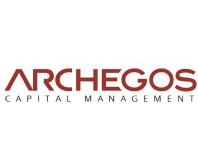

#### **References**

[Credit Suisse - Archegos info kit](https://www.credit-suisse.com/about-us/en/reports-research/archegos-info-kit.html):
- CREDIT SUISSE GROUP SPECIAL COMMITTEE OF THE BOARD OF DIRECTORS
REPORT ON ARCHEGOS CAPITAL MANAGEMENT
- Credit Suisse response to the Paul Weiss report


News (youtube):
- [CNBC - What we know about how banks helped Bill Hwang make large leverage bets](https://www.youtube.com/watch?v=glaVAH_D5HU)
- [CNBC - How Archegos Capital bypassed U.S. regulation](https://www.youtube.com/watch?v=QY8zRRu1QF8)
- [CNBC - Evaluating the fallout from the Archegos margin call](https://www.youtube.com/watch?v=5UKir1sndzE)
- [CNBC - A look at the consequences of Hwang's margin call](https://www.youtube.com/watch?v=OczEbZ6WnV0)
- [Bloobmerg Market and Finance - Credit Suisse Takes $4.7 Billion Archegos Hit](https://www.youtube.com/watch?v=Yn5S91t3z6Y)
- [Bloobmerg Market and Finance - Archegos Capital Blowup: What Investors Need to Know](https://www.youtube.com/watch?v=ioYkMF1KzYU&t=213s)
- [Bloomberg Quichtake - How to lose \$20 Billions in Two Days](https://www.youtube.com/watch?v=MhMhg97fmzE)
- [Cold Fusion - When Risk Taking Goes Too Far - The Archegos Collapse](https://www.youtube.com/watch?v=NtP3xT53dkU)


Aricles:
- [The collapse of Archegos Capital Management](https://www.thetradenews.com/the-collapse-of-archegos-capital-management/)
- [Archegos collapse caught sophisticated bankers off guard, but there are lessons for ordinary investors, too](https://financialpost.com/investing/archegos-collapse-caught-sophisticated-bankers-off-guard-but-there-are-lessons-for-ordinary-investors-too)
- [What Is Archegos and How Did It Rattle the Stock Market?](https://www.wsj.com/articles/what-is-archegos-and-how-did-it-rattle-the-stock-market-11617044982)

Other:
- [Bill Hwang, Wikipedia](https://en.wikipedia.org/wiki/Bill_Hwang)
- [Archegos Capital Management, Wikipedia](https://en.wikipedia.org/wiki/Archegos_Capital_Management)
- [Family office, Investipedia](https://www.investopedia.com/terms/f/family-offices.asp)
- [SEC Form 13F, Investopedia](https://www.investopedia.com/terms/f/form-13f.asp)
- [Prime Brokerage, Investopedia](https://www.investopedia.com/terms/p/primebrokerage.asp)
- [Dodd-Frank Act - Family office perspective, SEC](https://www.sec.gov/news/press/2011/2011-134.htm)

Before we get to the part where risk management failed and how this financial disaster could be avoided, we must first cover some topics in order to fully understand the complexity behind this unfortunate event.

#### **Introduction - Key facts**

- Archegos Capital Management was a family office that managed the personal assets of Bill Hwang.
- The Archegos Capital Management was started in 2013 and in 2020 it had $10 billion under management. But its total positions that were unwound in April 2021 approached \$30 billion thanks to leverage Archegos obtained from banks
- Previous to running familiy office, Bill Hwang had a hedge fond called Tiger Asia Management for investing in Asian markets. 
- In 2012 he pleaded guilty to insider trading of Chinese bank stocks  and paid a \$44 million fine. 
- Bill Hwang didn't have a sophisticated trading strategies. He most often had highly leveraged and concentrated bets into several equities.
- Archegos holdings was primarily trading in the form of total return swaps, a financial instrument where the underlying securities (stocks) are held by banks. This meant that Archegos did not need to disclose its large holdings, while if it had transacted in regular stocks it would have had to. The fund was also heavily leveraged and did business with multiple banks which were likely unaware of Archegos large positions held by other banks.

#### **Family office**
- Family offices provide a broad spectrum of private wealth management services to one or a small number of ultra-high-net-worth families.
- Besides financial services, family offices also offer planning, charitable giving advice, concierge, and other comprehensive services.
- Single-family offices serve one individual and their family, while multi-family offices serve a few families benefiting from economies of scale.
- **Dodd-Frank Act, 2011**:
  - Family offices are excluded from the Investment Advisers Act of 1940.
  - *“Family offices” are entities established by wealthy families to manage   their wealth and provide other services to family members, such as tax and estate planning services. Historically, family offices have not been required to register with the SEC under the Advisers Act because of an exemption provided to investment advisers with fewer than 15 clients.*
- Under Dodd-Frank Act, famili offices are not require to report 13F filing to the SEC:
  - The SEC’s Form 13F must be filed quarterly by institutional investment managers with at least $100 million in assets under management.
  - It discloses their equity holdings and can provide insights into what the smart money is doing in the market.

#### **Total Return Swap**

A total return swap is a swap agreement in which one party makes payments based on a set rate, either fixed or variable, while the other party makes payments based on the return of an underlying asset, which includes both the income it generates and any capital gains. 
- Total return swaps permit the party receiving the total return to benefit from the reference asset without owning it.
- The receiving party also collects any income generated by the asset (dividents, coupon payments) but, in exchange, must pay a set rate over the life of the swap.
- If the asset's price falls over the swap's life, the total return receiver will be required to pay the asset owner the amount by which the asset has fallen.
- The **receiver assumes systematic and credit risks**, while the other party, the **payer assumes no performance risk but takes on the credit exposure the receiver may be subject to**.

#### **Prime Brokerage**

A prime brokerage is a bundled group of services that investment banks and other financial institutions offer to hedge funds and other large investment clients that need to be able to borrow securities or cash in order to engage in netting to achieve absolute returns.
- Services included within a prime brokerage bundle may include cash management, securities lending, and more.
- The services of a prime brokerage aid hedge funds in accessing research, finding new investors, borrowing securities or cash, and more.
- Financial institutions need a minimum account size to be able to transact with prime brokers and all prime brokers have different requirements and fees.
- Prime brokers are some of the largest financial services firms, including Goldman Sachs, UBS, Morgan Stanley, Credit Suisse Group, Deutsche Bank AG, Nomura Holdings, etc.

#### **Archegos assets**

Archegos describes itself as focused on public stocks in the U.S., China, Japan, South Korea and Europe. 

Before its default, it played a part in the strong rally—and subsequent fall—in shares of:
- ViacomCBS Inc. [VIAC]
- Discovery Inc. [DISCB]
- Farfetch Ltd.  [FTCH] 
- Tencent Music Entertainment Group, [TME]
- Baidu Inc. [BIDU]
- IQIYI Inc. [IQ]

In [56]:
archegos_assets = ["VIAC", "DISCB", "FTCH", "TME", "BIDU"]

In [57]:
def get_portfolio_asset_prices(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  return stock_data

In [58]:
prices = get_portfolio_asset_prices(archegos_assets, start="2021-03-01", end="2021-04-15")
prices.tail()

,BIDU,DISCB,FTCH,TME,VIAC
Date,,,,,
2021-04-08,226.770004,82.110001,51.750000,19.250000,42.290001
2021-04-09,219.669998,77.000000,51.169998,19.219999,41.880001
2021-04-12,214.139999,72.540001,51.169998,18.030001,39.770000
2021-04-13,216.559998,75.000000,51.599998,18.219999,40.490002
2021-04-14,216.259995,97.629997,52.570000,18.150000,40.220001


In [59]:
fig=go.Figure()
for ticker in archegos_assets:
  fig.add_trace(go.Scatter(x=prices.index, y=prices[ticker], name=ticker))
fig.update_layout(xaxis_title='Dates',yaxis_title='Stock price',
        title=dict(text='Archegos assets', x=0.5, y=0.87, font=dict(size=22,color='Navy')))
fig.show()

#### **Margin call - March 26, 2021**

Mr. Hwang’s strategy backfired, as the stock price of companies in which Archegos had significant exposure, including China internet-search giant Baidu and Farfetch, began to sell off. 

Baidu’s stock price rose sharply in February, but by mid-March its shares had dropped more than 20% from its highs.

ViacomCBS on March 22 announced a sale of common stock, which put further stress on Archegos.

Losses from March 22nd to March 26th:

In [60]:
prices_top = prices.loc["2021-03-22"]
prices_bottom = prices.loc["2021-03-26"]

losses = (prices_bottom - prices_top)/prices_top
losses

BIDU    -0.216135
DISCB   -0.418673
FTCH    -0.178387
TME     -0.348882
VIAC    -0.519334
dtype: float64

As Achegos hold positions in these companies though Total Return Swaps, when the sell of began, prime brokers that Achegos had TRS contracts with required margin call to cover the losses that is binding by the company. 

Archagos defaulted on its TRS positions, failing to fulfill the margin call. As a result, banks liquidated the positions. Some of the acted more quickly avoiding losses and the ones who acted the slowes took the hude losses:
- UBS $774 M
- Morgan Stanley \$1 B
- Nomura \$2.9 B
- Credit Suisse \$5 B

#### **Risk Management**

**Regulatory risk**

As explaned previously all the drawbacks and advantages of the Family offices and shadow banking institutions, they are not so tightly regulated and controlled by the SEC or any other regulatory body as with the hedge fonds and investment banks.

As that section of market if growing largeg and largers, regulators might be unable to see some systematics risks with them because of the lack of control and overight.

And with Dodd-Frank act, as long as they serve on efamily and don't give financial adives to other partis they are not required to register with SEC (and subbmit 13F filings). That was the case with Archegos as well.

**Operational risk**

Banks failed with the operational risk.

Bill Hwang was convicted for insider trading in 2012. He should have been on the banks' black list. Even worse, they allowed him to take highly leveraged positions. Better internal policies and procedures should be put in place to prevent this scenario from happening again.

**Credit risk**

With the lack of transparency, regulation and overight, banks were unable to properly identify and quantify Archegos's credit risk. Most probably, banks weren't aware that Archagos had numerous positions with multiple banks. Because of that they weren't able to properly evaluate Archagos creditworthiness and the default probability.

Although after 2008 GFC, series of regulations were introduced for the OTC derivatives markets, in black swan events like this, it is obvious that there is always room for improvement.

**Liquidity risk**

When the stock sell-off began and Archegos failed to fulfil margni call, banks started unwinding and exiting those equity positions.

Some of them were quicker and escaped the whole this situation relatively without any scratches like Goldman Sachs. And some of them, were so quick and lucky and took huge losses, like Credit Suisse.

**Reputational risk**

Banks like Credit Suisse due to lack of good risk management suffered great financial loss. That loss can be made up, but reputational damage is more lasting and harder to fix.